### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [1]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

# Importing the Dataset

Run the cell below to donwload the dataset into the console.


In [2]:
# await download(filepath, "laptops.csv")
file_name="laptops.csv"

In [3]:
df = pd.read_csv(file_name, header=0)

Import the data set into a data frame.


Print the value of df.head(). 


In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


Drop the two unnecessary columns that have been added into the file, 'Unnamed: 0' and 'Unnamed: 0.1'. Use drop to delete these columns.


In [5]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

# Task 1 : Using Cross validation to improve the model

Divide the dataset into x_data and y_data parameters. Here y_data is the "Price" attribute, and x_data has all other attributes in the data set.


In [7]:
# Write your code below and press Shift+Enter to execute 
y_data = df['Price']
x_data = df.drop('Price',axis=1)


Split the data set into training and testing subests such that you reserve 10% of the data set for testing purposes.


In [9]:
# Write your code below and press Shift+Enter to execute 
x_train ,x_test ,y_train, y_test = train_test_split(x_data,y_data,test_size=0.1,random_state=1)
print("The number of sample for training: ",x_train.shape[0])
print("The number of sample for testing: ",x_test.shape[0])


The number of sample for training:  214
The number of sample for testing:  24


Create a single variable linear regression model using "CPU_frequency" parameter. Print the R^2 value of this model for the training and testing subsets.


In [10]:
# Write your code below and press Shift+Enter to execute 
lr =LinearRegression()
lr.fit(x_train[['CPU_frequency']],y_train)
print(lr.score(x_train[['CPU_frequency']],y_train))

print(lr.score(x_test[['CPU_frequency']],y_test))


0.14829792099817984
-0.06599437350393811


Run a 4-fold cross validation on the model and print the mean value of R^2 score along with its standard deviation.


In [11]:
# Write your code below and press Shift+Enter to execute 
model = cross_val_score(lr,x_train[['CPU_frequency']],y_train,cv=4)
print("the mean of the flds are",model.mean(), " and the standard deviation is : ",model.std())

the mean of the flds are 0.12738818019555032  and the standard deviation is :  0.08317058010912012


# Task 2: Overfitting

Split the data set into training and testing components again, this time reserving 50% of the data set for testing.


In [13]:
# Write your code below and press Shift+Enter to execute 
x_train1 ,x_test1 ,y_train1, y_test1 = train_test_split(x_data,y_data,test_size=0.5,random_state=0)
print("The number of sample for training: ",x_train1.shape[0])
print("The number of sample for testing: ",x_test1.shape[0])

The number of sample for training:  119
The number of sample for testing:  119


To identify the point of overfitting the model on the parameter "CPU_frequency", you'll need to create polynomial features using the single attribute. 
You need to evaluate the R^2 scores of the model created using different degrees of polynomial features, ranging from 1 to 5. Save this set of values of R^2 score as a list.


In [14]:
# Write your code below and press Shift+Enter to execute 
lre = LinearRegression()
Rsqu_test = []
order = [1, 2, 3, 4, 5]
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train[['CPU_frequency']])
    x_test_pr = pr.fit_transform(x_test[['CPU_frequency']])    
    lre.fit(x_train_pr, y_train)
    Rsqu_test.append(lre.score(x_test_pr, y_test))

Plot the values of R^2 scores against the order. Note the point where the score drops.


Text(0.5, 1.0, 'R^2 using test Data')

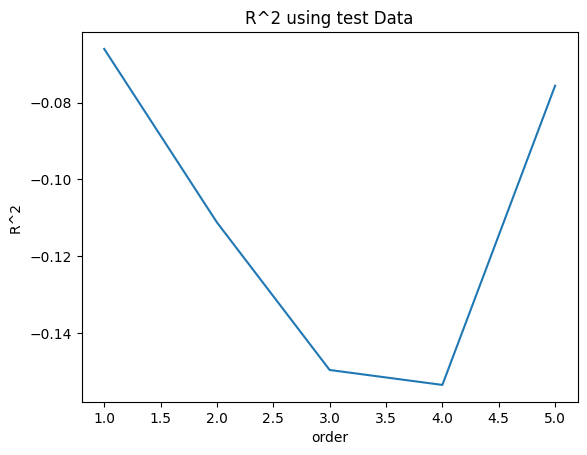

In [15]:
# Write your code below and press Shift+Enter to execute 
plt.plot(order,Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2 ')
plt.title("R^2 using test Data")


# Task 3 : Ridge Regression

Now consider that you have multiple features, i.e. 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU' and 'Category'. Create a polynomial feature model that uses all these parameters with degree=2. Also create the training and testing attribute sets.


In [32]:
# Write your code below and press Shift+Enter to execute 
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train1[['CPU_frequency','RAM_GB','Storage_GB_SSD','CPU_core','OS','GPU','Category']])
x_test_pr = pr.fit_transform(x_test1[['CPU_frequency','RAM_GB','Storage_GB_SSD','CPU_core','OS','GPU','Category']])


Create a Ridge Regression model and evaluate it using values of the hyperparameter alpha ranging from 0.001 to 1 with increments of 0.001. 
Create a list of all Ridge Regression R^2 scores for training and testing data. 


In [34]:
# Write your code below and press Shift+Enter to execute 
Rsqu_test = []
Rsqu_train = []
Alpha = np.arange(0.001,1,0.001)
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train1)
    test_score, train_score = RigeModel.score(x_test_pr, y_test1), RigeModel.score(x_train_pr, y_train1)
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

  0%|          | 0/999 [00:00<?, ?it/s, Test Score=0.424, Train Score=0.688]

100%|██████████| 999/999 [00:11<00:00, 89.83it/s, Test Score=0.423, Train Score=0.669] 


Plot the R^2 values for training and testing sets with respect to the value of alpha


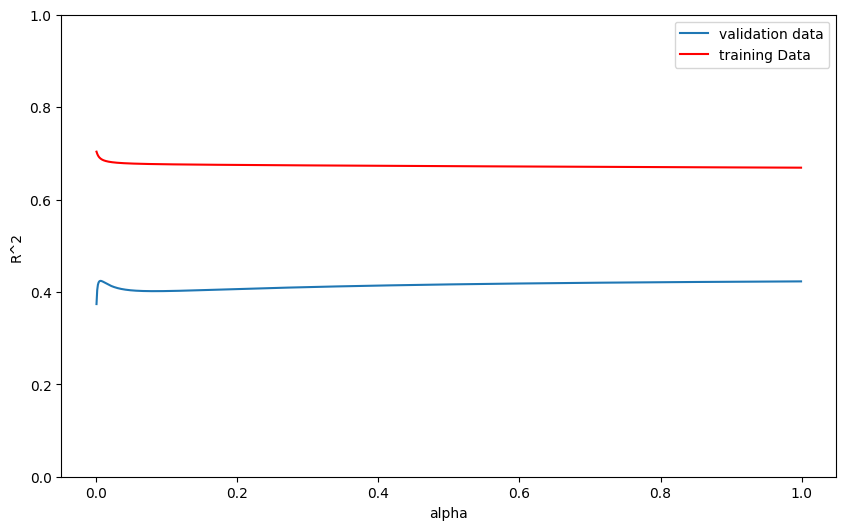

In [35]:
# Write your code below and press Shift+Enter to execute 
plt.figure(figsize=(10, 6))  
plt.plot(Alpha, Rsqu_test, label='validation data')
plt.plot(Alpha, Rsqu_train, 'r', label='training Data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.ylim(0, 1)
plt.legend()


# Task 4: Grid Search

Using the raw data and the same set of features as used above, use GridSearchCV to identify the value of alpha for which the model performs best. 
Assume the set of alpha values to be used as
```math
{0.0001, 0.001, 0.01, 0.1, 1, 10}
```


In [40]:
# Write your code below and press Shift+Enter to execute 
param = {'alpha':[0.001,0.001,0.01,0.1,1,10]}



Create a Ridge instance and run Grid Search using a 4 fold cross validation.


In [41]:
# Write your code below and press Shift+Enter to execute 
rr =Ridge()
grid = GridSearchCV(rr,param,cv=4)


Fit the Grid Search to the training data.


In [42]:
grid.fit(x_train1[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']], y_train1)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.001, 0.01, 0.1, 1, 10]})

Print the R^2 score for the test data using the estimator that uses the derived optimum value of alpha.


In [43]:
# Write your code below and press Shift+Enter to execute 
BestRR=grid.best_estimator_
print(BestRR.score(x_test1[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU','Category']], y_test1))

0.300990504869182


<!--## Change Log


<!--|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-09-16|0.1|Abhishek Gagneja|Initial Version Created|
|2023-09-19|0.2|Vicky Kuo|Reviewed and Revised|
--!>
